# Validity of using prescription records to identify patient comorbidities
## Combined Analysis of Asthma and COPD combined

**ReadMe:**
- This is a script used in the analysis for Schnier et al., 2025: Validity of using prescription records to classify disease – a record linkage study using routinely collected electronic health records from the UK.
- The underlying data set has been created using the Optimum Patient Care Research Database (https://opcrd.optimumpatientcare.org/). The authors do not have permission to give the public access to the study dataset; researchers may request access to OPCRD for their own purposes. 
 - All code is run in StataSE 18. 


**Set up:**
|Var|Input|
| --- | --- | 
|population|425,000|
|diagnostic codes|Jenni Quint|
|drug codes|bnf selection,Jenni Quint|
|sql date|22.06.2025|
|sql code|asthmacopdselection_20250622.sql| 

In [1]:
    clear all

### Import from SQL server and data wrangling

In [2]:
odbc load, exec("select * from [asco_425000_20250622]") dsn("sqlserverconnect")

In [3]:
generate test=0 if missing(drug_dt)
replace test=1 if ! missing(drug_dt)  

generate diag=0 if missing(diag_dt)
replace diag=1 if ! missing(diag_dt)  

gen start_year=year(fu_start_dt)


egen agecat = cut(age), at(16,30,70,120)
label def agecat_lab 16 "Young" 30 "0Middle" 70 "Elderly" 120 "weird"
label values agecat agecat_lab

egen yearcat = cut(start_year), at(2004,2010,2016,2025)
label def yearcat_lab 2004 "2004-2009" 2010 "2010-2015" 2016 "2016-2020" 
label values yearcat yearcat_lab

egen imdcat = cut(imd_decile), at(0,4,8,11)
label def imdcat_lab 0 "1-3" 4 "4-7" 8 "8-10" 
label values imdcat imdcat_lab


replace bnf_code = "Adrenoreceptor agonist" if bnf_code== "030101"
replace bnf_code = "Antimuscarinic Bronchodilator" if bnf_code== "030102"
replace bnf_code = "Theophylline" if bnf_code== "030103"
replace bnf_code = "Compound bronchodilator" if bnf_code== "030104"
replace bnf_code = "Devices" if bnf_code== "030105" | bnf_code=="210102" | bnf_code=="211200"
replace bnf_code = "Corticosteroids" if bnf_code== "030200"
replace bnf_code = "Topical nasal decongestance" if bnf_code== "120202"
replace bnf_code = "Glucocorticoid" if bnf_code== "060302"
replace bnf_code = "Other/unknown" if missing(bnf_code) & ! missing(drug_dt)



replace ethnicity="0white" if ethnicity=="1"
replace ethnicity="Other" if ethnicity=="2"
replace ethnicity="Other" if ethnicity=="3"
replace ethnicity="Other" if ethnicity=="4"
replace ethnicity="Other" if ethnicity=="5"
replace ethnicity="Missing" if ethnicity=="99"


encode bnf_code, generate(bnf_code_values) 
encode description, generate(description_values)
encode ethnicity, generate(ethnicity_values) 

gen diag_neg=diag==0
gen diag_pos=diag==1
encode region_name, generate(region) label(regionlbl)
encode ethnicity, generate(ethnic)


(74,767 missing values generated)
(74,767 real changes made)
(44,381 missing values generated)
(44,381 real changes made)
(2,589 missing values generated)
variable bnf_code was str6 now str22
(36,795 real changes made)
variable bnf_code was str22 now str29
(3,269 real changes made)
(362 real changes made)
(877 real changes made)
(2,157 real changes made)
(17,147 real changes made)
(91 real changes made)
(573 real changes made)
variable ethnicity was str2 now str6
(257,981 real changes made)
(3,762 real changes made)
(23,912 real changes made)
(7,430 real changes made)
(8,764 real changes made)
variable ethnicity was str6 now str7
(123,151 real changes made)


(bin=19, start=16, width=5)


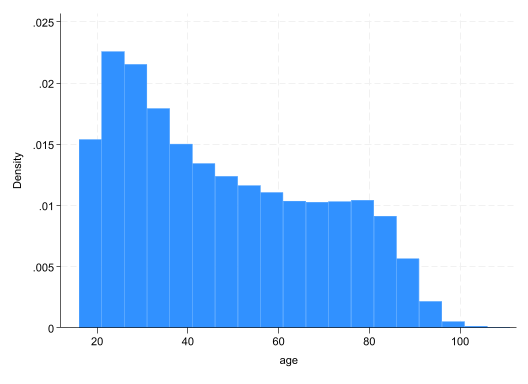

In [4]:
histogram age, width(5)


This table holds one randomly selected diagnostic code found during the observation period. The table is truncated to only include diagnostic codes with a count of 10 or more.

In [5]:
set linesize 132
groups description , select(f >= 10) ord(h) table 


  +-----------------------------------------------------------------------------------------------------+
  |                                                               description   Freq.   Percent     %<= |
  |-----------------------------------------------------------------------------------------------------|
  |                                                                    asthma    5244     11.82   11.82 |
  |                                                      Asthma annual review    3246      7.31   19.13 |
  |                     other specified chronic obstructive pulmonary disease    2181      4.91   24.04 |
  |                       Chronic obstructive pulmonary disease annual review    1853      4.18   28.22 |
  |                                            Asthma not limiting activities    1618      3.65   31.86 |
  |-----------------------------------------------------------------------------------------------------|
  |                                          

These tables holds one randomly selected prescrption during the observation period. The table is truncated to only include codes with a count of 10 or more.


In [6]:
set linesize 132
groups bnf_code , select(f >= 10) ord(h) table 


  +---------------------------------------------------------+
  |                      bnf_code   Freq.   Percent     %<= |
  |---------------------------------------------------------|
  |        Adrenoreceptor agonist   36795     49.21   49.21 |
  |               Corticosteroids   17147     22.93   72.15 |
  |                        060302   13491     18.04   90.19 |
  | Antimuscarinic Bronchodilator    3269      4.37   94.56 |
  |                       Devices    2157      2.88   97.45 |
  |---------------------------------------------------------|
  |       Compound bronchodilator     877      1.17   98.62 |
  |                 Other/unknown     573      0.77   99.39 |
  |                  Theophylline     362      0.48   99.87 |
  |   Topical nasal decongestance      91      0.12   99.99 |
  +---------------------------------------------------------+


### Results
#### Overall

In [7]:
diagt diag test


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |    42,120      2,261 |    44,381 
    Normal |    32,647    347,972 |   380,619 
-----------+----------------------+----------
     Total |    74,767    350,233 |   425,000 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)     10.4%     10.4%      10.5%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     94.9%     94.7%     95.1%
Specificity                      Pr(-|N)     91.4%     91.3%     91.5%
ROC area               (Sens. + Spec.)/2      0.93      0.93      0.93 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     11.06     10.

#### Males

In [8]:
diagt diag test if sex==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |    19,155      1,162 |    20,317 
    Normal |    13,517    174,451 |   187,968 
-----------+----------------------+----------
     Total |    32,672    175,613 |   208,285 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      9.8%      9.6%       9.9%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     94.3%     94.0%     94.6%
Specificity                      Pr(-|N)     92.8%     92.7%     92.9%
ROC area               (Sens. + Spec.)/2      0.94      0.93      0.94 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     13.11     12.

#### Females

In [9]:
diagt diag test if sex==0


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |    22,965      1,099 |    24,064 
    Normal |    19,129    173,513 |   192,642 
-----------+----------------------+----------
     Total |    42,094    174,612 |   216,706 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)     11.1%     11.0%      11.2%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     95.4%     95.2%     95.7%
Specificity                      Pr(-|N)     90.1%     89.9%     90.2%
ROC area               (Sens. + Spec.)/2      0.93      0.93      0.93 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)      9.61      9.

#### Age
*16-29*

In [10]:
diagt diag test if agecat==16


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     6,901        495 |     7,396 
    Normal |     6,233    104,045 |   110,278 
-----------+----------------------+----------
     Total |    13,134    104,540 |   117,674 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      6.3%      6.1%       6.4%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     93.3%     92.7%     93.9%
Specificity                      Pr(-|N)     94.3%     94.2%     94.5%
ROC area               (Sens. + Spec.)/2      0.94      0.94      0.94 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     16.51     16.

*30-69*

In [11]:
diagt diag test if agecat==30


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |    21,658      1,027 |    22,685 
    Normal |    16,087    182,623 |   198,710 
-----------+----------------------+----------
     Total |    37,745    183,650 |   221,395 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)     10.2%     10.1%      10.4%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     95.5%     95.2%     95.7%
Specificity                      Pr(-|N)     91.9%     91.8%     92.0%
ROC area               (Sens. + Spec.)/2      0.94      0.94      0.94 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     11.79     11.

In [12]:
diagt diag test if agecat==70


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |    13,561        739 |    14,300 
    Normal |    10,327     61,304 |    71,631 
-----------+----------------------+----------
     Total |    23,888     62,043 |    85,931 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)     16.6%     16.4%      16.9%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     94.8%     94.5%     95.2%
Specificity                      Pr(-|N)     85.6%     85.3%     85.8%
ROC area               (Sens. + Spec.)/2      0.90      0.90      0.90 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)      6.58      6.

#### Year at start of oberservation period 
*2004-2009*

In [13]:
diagt diag test if yearcat==2004


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |    15,656        849 |    16,505 
    Normal |    12,296    121,199 |   133,495 
-----------+----------------------+----------
     Total |    27,952    122,048 |   150,000 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)     11.0%     10.8%      11.2%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     94.9%     94.5%     95.2%
Specificity                      Pr(-|N)     90.8%     90.6%     90.9%
ROC area               (Sens. + Spec.)/2      0.93      0.93      0.93 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     10.30     10.

*2010-2015*

In [14]:
diagt diag test if yearcat==2010


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |    14,777        791 |    15,568 
    Normal |    11,769    122,663 |   134,432 
-----------+----------------------+----------
     Total |    26,546    123,454 |   150,000 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)     10.4%     10.2%      10.5%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     94.9%     94.6%     95.3%
Specificity                      Pr(-|N)     91.2%     91.1%     91.4%
ROC area               (Sens. + Spec.)/2      0.93      0.93      0.93 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     10.84     10.

*2016-2020*

In [15]:
diagt diag test if yearcat==2016


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |    11,687        621 |    12,308 
    Normal |     8,582    104,110 |   112,692 
-----------+----------------------+----------
     Total |    20,269    104,731 |   125,000 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      9.8%      9.7%      10.0%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     95.0%     94.6%     95.3%
Specificity                      Pr(-|N)     92.4%     92.2%     92.5%
ROC area               (Sens. + Spec.)/2      0.94      0.93      0.94 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     12.47     12.

#### IMD of practice
*1-3*

In [16]:
diagt diag test if imdcat==0


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |    15,331        900 |    16,231 
    Normal |    11,642    126,678 |   138,320 
-----------+----------------------+----------
     Total |    26,973    127,578 |   154,551 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)     10.5%     10.3%      10.7%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     94.5%     94.1%     94.8%
Specificity                      Pr(-|N)     91.6%     91.4%     91.7%
ROC area               (Sens. + Spec.)/2      0.93      0.93      0.93 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     11.22     11.

*4-7*

In [17]:
diagt diag test if imdcat==4


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |    14,908        698 |    15,606 
    Normal |    11,522    115,917 |   127,439 
-----------+----------------------+----------
     Total |    26,430    116,615 |   143,045 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)     10.9%     10.7%      11.1%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     95.5%     95.2%     95.8%
Specificity                      Pr(-|N)     91.0%     90.8%     91.1%
ROC area               (Sens. + Spec.)/2      0.93      0.93      0.93 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     10.57     10.

*8-10*

In [18]:
diagt diag test if imdcat==8


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |    11,730        657 |    12,387 
    Normal |     9,398    103,030 |   112,428 
-----------+----------------------+----------
     Total |    21,128    103,687 |   124,815 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      9.9%      9.8%      10.1%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     94.7%     94.3%     95.1%
Specificity                      Pr(-|N)     91.6%     91.5%     91.8%
ROC area               (Sens. + Spec.)/2      0.93      0.93      0.93 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     11.33     11.

#### Commissioning Regions
EAST OF ENGLAND

In [19]:
diagt diag test if regexm(region_name,"ENGLAND")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     9,648        465 |    10,113 
    Normal |     8,028     71,496 |    79,524 
-----------+----------------------+----------
     Total |    17,676     71,961 |    89,637 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)     11.3%     11.1%      11.5%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     95.4%     95.0%     95.8%
Specificity                      Pr(-|N)     89.9%     89.7%     90.1%
ROC area               (Sens. + Spec.)/2      0.93      0.92      0.93 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)      9.45      9.

London

In [20]:
diagt diag test if regexm(region_name,"LONDON")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     1,128         89 |     1,217 
    Normal |       857     14,651 |    15,508 
-----------+----------------------+----------
     Total |     1,985     14,740 |    16,725 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      7.3%      6.9%       7.7%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     92.7%     91.1%     94.1%
Specificity                      Pr(-|N)     94.5%     94.1%     94.8%
ROC area               (Sens. + Spec.)/2      0.94      0.93      0.94 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     16.77     15.

Midlands

In [21]:
diagt diag test if regexm(region_name,"MID")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     5,384        286 |     5,670 
    Normal |     3,940     36,933 |    40,873 
-----------+----------------------+----------
     Total |     9,324     37,219 |    46,543 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)     12.2%     11.9%      12.5%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     95.0%     94.4%     95.5%
Specificity                      Pr(-|N)     90.4%     90.1%     90.6%
ROC area               (Sens. + Spec.)/2      0.93      0.92      0.93 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)      9.85      9.

Yorkshire

In [22]:
diagt diag test if regexm(region_name,"YORK")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     8,660        427 |     9,087 
    Normal |     6,347     70,677 |    77,024 
-----------+----------------------+----------
     Total |    15,007     71,104 |    86,111 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)     10.6%     10.3%      10.8%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     95.3%     94.8%     95.7%
Specificity                      Pr(-|N)     91.8%     91.6%     92.0%
ROC area               (Sens. + Spec.)/2      0.94      0.93      0.94 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     11.57     11.

North West

In [23]:
diagt diag test if regexm(region_name,"NORTH")==1 & regexm(region_name,"WEST")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     4,658        277 |     4,935 
    Normal |     3,108     39,550 |    42,658 
-----------+----------------------+----------
     Total |     7,766     39,827 |    47,593 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)     10.4%     10.1%      10.6%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     94.4%     93.7%     95.0%
Specificity                      Pr(-|N)     92.7%     92.5%     93.0%
ROC area               (Sens. + Spec.)/2      0.94      0.93      0.94 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     12.95     12.

South East

In [24]:
diagt diag test if regexm(region_name,"SOUTH")==1 & regexm(region_name,"EAST")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     7,654        432 |     8,086 
    Normal |     6,444     75,955 |    82,399 
-----------+----------------------+----------
     Total |    14,098     76,387 |    90,485 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      8.9%      8.8%       9.1%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     94.7%     94.1%     95.1%
Specificity                      Pr(-|N)     92.2%     92.0%     92.4%
ROC area               (Sens. + Spec.)/2      0.93      0.93      0.94 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     12.10     11.

South West

In [25]:
diagt diag test if regexm(region_name,"SOUTH")==1 & regexm(region_name,"WEST")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     3,888        213 |     4,101 
    Normal |     3,004     29,071 |    32,075 
-----------+----------------------+----------
     Total |     6,892     29,284 |    36,176 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)     11.3%     11.0%      11.7%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     94.8%     94.1%     95.5%
Specificity                      Pr(-|N)     90.6%     90.3%     91.0%
ROC area               (Sens. + Spec.)/2      0.93      0.92      0.93 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     10.12      9.

#### System
SystmOne

In [26]:
diagt diag test if regexm(system,"One")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |    23,994      1,156 |    25,150 
    Normal |    19,051    184,554 |   203,605 
-----------+----------------------+----------
     Total |    43,045    185,710 |   228,755 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)     11.0%     10.9%      11.1%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     95.4%     95.1%     95.7%
Specificity                      Pr(-|N)     90.6%     90.5%     90.8%
ROC area               (Sens. + Spec.)/2      0.93      0.93      0.93 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     10.20     10.

Vision

In [27]:
diagt diag test if regexm(system,"Vision")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     1,352         74 |     1,426 
    Normal |     1,089     11,229 |    12,318 
-----------+----------------------+----------
     Total |     2,441     11,303 |    13,744 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)     10.4%      9.9%      10.9%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     94.8%     93.5%     95.9%
Specificity                      Pr(-|N)     91.2%     90.6%     91.7%
ROC area               (Sens. + Spec.)/2      0.93      0.92      0.94 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     10.72     10.

EMIS

In [28]:
diagt diag test if regexm(ustrupper(system),"EMIS")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |    16,714      1,029 |    17,743 
    Normal |    12,491    152,131 |   164,622 
-----------+----------------------+----------
     Total |    29,205    153,160 |   182,365 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      9.7%      9.6%       9.9%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     94.2%     93.8%     94.5%
Specificity                      Pr(-|N)     92.4%     92.3%     92.5%
ROC area               (Sens. + Spec.)/2      0.93      0.93      0.93 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     12.41     12.

#### RA_Index
Index==1

In [29]:
diagt diag test if RA_index==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |    31,209      1,774 |    32,983 
    Normal |    23,764    264,950 |   288,714 
-----------+----------------------+----------
     Total |    54,973    266,724 |   321,697 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)     10.3%     10.1%      10.4%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     94.6%     94.4%     94.9%
Specificity                      Pr(-|N)     91.8%     91.7%     91.9%
ROC area               (Sens. + Spec.)/2      0.93      0.93      0.93 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     11.50     11.

Index==0

In [30]:
diagt diag test if RA_index==0


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |    10,911        487 |    11,398 
    Normal |     8,883     83,022 |    91,905 
-----------+----------------------+----------
     Total |    19,794     83,509 |   103,303 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)     11.0%     10.8%      11.2%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     95.7%     95.3%     96.1%
Specificity                      Pr(-|N)     90.3%     90.1%     90.5%
ROC area               (Sens. + Spec.)/2      0.93      0.93      0.93 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)      9.90      9.

#### Ethnicity
Ethnicity==0000white

In [31]:
diagt diag test if ethnicity=="0white"


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |    30,950      1,527 |    32,477 
    Normal |    21,850    203,654 |   225,504 
-----------+----------------------+----------
     Total |    52,800    205,181 |   257,981 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)     12.6%     12.5%      12.7%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     95.3%     95.1%     95.5%
Specificity                      Pr(-|N)     90.3%     90.2%     90.4%
ROC area               (Sens. + Spec.)/2      0.93      0.93      0.93 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)      9.84      9.

In [32]:
diagt diag test if ethnicity=="Other"


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     2,707        211 |     2,918 
    Normal |     2,814     38,136 |    40,950 
-----------+----------------------+----------
     Total |     5,521     38,347 |    43,868 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      6.7%      6.4%       6.9%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     92.8%     91.8%     93.7%
Specificity                      Pr(-|N)     93.1%     92.9%     93.4%
ROC area               (Sens. + Spec.)/2      0.93      0.92      0.93 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     13.50     13.

In [33]:
diagt diag test if ethnicity=="Missing"


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     8,463        523 |     8,986 
    Normal |     7,983    106,182 |   114,165 
-----------+----------------------+----------
     Total |    16,446    106,705 |   123,151 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      7.3%      7.2%       7.4%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     94.2%     93.7%     94.7%
Specificity                      Pr(-|N)     93.0%     92.9%     93.2%
ROC area               (Sens. + Spec.)/2      0.94      0.93      0.94 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     13.47     13.

In [34]:
tempname memhold
postfile `memhold' str20 var prev sens spec ppv npv roc using "validity.dta",replace

quietly diagt diag test
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("all") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if sex==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Male") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if sex==0
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Female") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if agecat==16
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Age young") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if agecat==30
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Age middle") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if agecat==70
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Age elderly") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 


quietly diagt diag test if yearcat==2004
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Year 2004-2009") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if yearcat==2010
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Year 2010-2015") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc')

quietly diagt diag test if yearcat==2016
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Year 2016-2020") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 


quietly diagt diag test if imdcat==0
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("IMD 1,3") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if imdcat==4
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("IMD 4,7") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if imdcat==8
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("IMD 8,10") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 


quietly diagt diag test if regexm(region_name,"LONDON")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("London") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(region_name,"MID")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Midlands") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(region_name,"YORK")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Yorkshire") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(region_name,"NORTH")==1 & regexm(region_name,"WEST")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("North West") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(region_name,"SOUTH")==1 & regexm(region_name,"EAST")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("South East") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(region_name,"SOUTH")==1 & regexm(region_name,"WEST")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("South West") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(system,"One")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("SystemOne") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(system,"Vision")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Vision") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(ustrupper(system),"EMIS")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("EMIS") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if RA_index==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("RAIndex1") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if RA_index==0
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("RAIndex0") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if ethnicity=="0white"
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Ethnicity_0white") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if ethnicity=="Other"
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Ethnicity_Other") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 



quietly diagt diag test if ethnicity=="Missing"
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Ethnicity_Missing") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

postclose `memhold'

### Logistic Regression
#### PPV

In [35]:
drop if missing(imdcat)
drop if missing(sex)

(2,589 observations deleted)
(9 observations deleted)


In [36]:
logistic diag_pos if test==1


Logistic regression                                     Number of obs = 74,530
                                                        LR chi2(0)    =   0.00
                                                        Prob > chi2   =      .
Log likelihood = -51064.881                             Pseudo R2     = 0.0000

------------------------------------------------------------------------------
    diag_pos |       Odds   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
       _cons |   1.288935   .0095188    34.37   0.000     1.270412    1.307727
------------------------------------------------------------------------------


In [37]:
logistic diag_pos i.bnf_code_values if test==1

note: 1.bnf_code_values != 0 predicts success perfectly;
      1.bnf_code_values omitted and 1 obs not used.

note: 3.bnf_code_values != 0 predicts failure perfectly;
      3.bnf_code_values omitted and 4 obs not used.

note: 11.bnf_code_values omitted because of collinearity.

Logistic regression                                   Number of obs =   74,525
                                                      LR chi2(8)    = 15546.43
                                                      Prob > chi2   =   0.0000
Log likelihood = -43287.78                            Pseudo R2     =   0.1522

------------------------------------------------------------------------------------------------
                      diag_pos | Odds ratio   Std. err.      z    P>|z|     [95% conf. interval]
-------------------------------+----------------------------------------------------------------
               bnf_code_values |
                       030303  |          1  (empty)
                       0603

In [38]:
gen newdiag=diag_pos

melogit newdiag i.sex i.yearcat i.agecat  i.region RA_index i.ethnic i.imdcat if test==1 || practice_id:,or
estimates store model1


Fitting fixed-effects model:

Iteration 0:  Log likelihood = -50572.285  
Iteration 1:  Log likelihood =  -50536.33  
Iteration 2:  Log likelihood = -50536.326  

Refining starting values:

Grid node 0:  Log likelihood = -50548.339

Fitting full model:

Iteration 0:  Log likelihood = -50548.339  (not concave)
Iteration 1:  Log likelihood = -50467.957  (not concave)
Iteration 2:  Log likelihood = -50388.952  (not concave)
Iteration 3:  Log likelihood = -50356.418  
Iteration 4:  Log likelihood =  -50343.26  
Iteration 5:  Log likelihood = -50342.467  
Iteration 6:  Log likelihood = -50342.462  
Iteration 7:  Log likelihood = -50342.462  

Mixed-effects logistic regression               Number of obs     =     74,291
Group variable: practice_id                     Number of groups  =        333

                                                Obs per group:
                                                              min =          1
                                                    

##### Likelihood ratio tests

In [39]:


quietly: melogit newdiag i.sex i.yearcat i.agecat  i.region RA_index i.ethnic if test==1 || practice_id:,or
estimates store model_imd

quietly:melogit newdiag i.sex i.yearcat i.agecat  i.region RA_index i.imdcat if test==1 || practice_id:,or
estimates store model_ethnicity

quietly:melogit newdiag i.yearcat i.agecat  i.region RA_index i.ethnic i.imdcat if test==1 || practice_id:,or
estimates store model_sex

quietly:melogit newdiag i.sex i.agecat  i.region RA_index i.ethnic i.imdcat if test==1 || practice_id:,or
estimates store model_year

quietly: melogit newdiag i.sex i.yearcat  i.region RA_index i.ethnic i.imdcat if test==1 || practice_id:,or
estimates store model_age



In [40]:
lrtest model1 model_sex
lrtest model1 model_year
lrtest model1 model_age
lrtest model1 model_ethnicity
lrtest model1 model_imd



Likelihood-ratio test
Assumption: model_sex nested within model1

 LR chi2(1) = 122.54
Prob > chi2 = 0.0000

Likelihood-ratio test
Assumption: model_year nested within model1

 LR chi2(2) =  18.13
Prob > chi2 = 0.0001

Likelihood-ratio test
Assumption: model_age nested within model1

 LR chi2(2) =  75.27
Prob > chi2 = 0.0000

Likelihood-ratio test
Assumption: model_ethnic~y nested within model1

 LR chi2(2) = 335.00
Prob > chi2 = 0.0000

Likelihood-ratio test
Assumption: model_imd nested within model1

 LR chi2(2) =   0.24
Prob > chi2 = 0.8888


#### NPV

In [41]:
logistic diag_neg if test==0


Logistic regression                                    Number of obs = 347,872
                                                       LR chi2(0)    =   -0.00
                                                       Prob > chi2   =       .
Log likelihood = -13609.909                            Pseudo R2     = -0.0000

------------------------------------------------------------------------------
    diag_neg |       Odds   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
       _cons |    153.267   3.238079   238.19   0.000       147.05    159.7467
------------------------------------------------------------------------------


In [42]:
/* need to use the same response variable (newdiag) to line up the two model results */
replace newdiag=diag_neg 

melogit newdiag i.sex i.yearcat i.agecat i.region RA_index i.ethnic i.imdcat if test==0 || practice_id:,or
estimates store model2

(422,402 real changes made)

Fitting fixed-effects model:

Iteration 0:  Log likelihood = -35506.286  
Iteration 1:  Log likelihood = -13505.025  
Iteration 2:  Log likelihood = -13362.369  
Iteration 3:  Log likelihood = -13321.886  
Iteration 4:  Log likelihood = -13321.855  
Iteration 5:  Log likelihood = -13321.855  

Refining starting values:

Grid node 0:  Log likelihood =  -12928.85

Fitting full model:

Iteration 0:  Log likelihood =  -12928.85  
Iteration 1:  Log likelihood = -12917.504  
Iteration 2:  Log likelihood =  -12910.75  
Iteration 3:  Log likelihood = -12907.858  
Iteration 4:  Log likelihood =  -12907.17  
Iteration 5:  Log likelihood = -12907.169  
Iteration 6:  Log likelihood = -12907.169  

Mixed-effects logistic regression               Number of obs     =    347,142
Group variable: practice_id                     Number of groups  =        335

                                                Obs per group:
                                                      

##### Likelihood ratio tests

In [43]:

quietly: melogit newdiag i.yearcat i.agecat i.region RA_index i.ethnic i.imdcat if test==0 || practice_id:,or
estimates store model2_sex
quietly: melogit newdiag i.sex i.agecat i.region RA_index i.ethnic i.imdcat if test==0 || practice_id:,or
estimates store model2_year
quietly: melogit newdiag i.sex i.yearcat i.region RA_index i.ethnic i.imdcat if test==0 || practice_id:,or
estimates store model2_age
quietly: melogit newdiag i.sex i.yearcat i.agecat i.region RA_index i.imdcat if test==0 || practice_id:,or
estimates store model2_ethnicity
quietly: melogit newdiag i.sex i.yearcat i.agecat i.region RA_index i.ethnic if test==0 || practice_id:,or
estimates store model2_imd


In [44]:
lrtest model2 model2_sex
lrtest model2 model2_year
lrtest model2 model2_age
lrtest model2 model2_ethnicity
lrtest model2 model2_imd



Likelihood-ratio test
Assumption: model2_sex nested within model2

 LR chi2(1) =   7.44
Prob > chi2 = 0.0064

Likelihood-ratio test
Assumption: model2_year nested within model2

 LR chi2(2) =  12.72
Prob > chi2 = 0.0017

Likelihood-ratio test
Assumption: model2_age nested within model2

 LR chi2(2) = 293.46
Prob > chi2 = 0.0000

Likelihood-ratio test
Assumption: model2_ethni~y nested within model2

 LR chi2(2) =  85.13
Prob > chi2 = 0.0000

Likelihood-ratio test
Assumption: model2_imd nested within model2

 LR chi2(2) =   1.12
Prob > chi2 = 0.5726


In [45]:
etable, estimates(model1 model2) showstars showstarsnote title("Table 2. PPV (1) and NPV (2),  OR, Random effect") cstat(_r_b,nformat(%6.2f)) column(index) export(validity2.xlsx, modify sheet(reg_asco_jq, replace))


Table 2. PPV (1) and NPV (2), OR, Random effect
------------------------------------------------------------------
                                                    1        2    
------------------------------------------------------------------
sex_coded                                                         
  1                                              1.18 **   0.89 **
yearcat                                                           
  2010-2015                                      0.95 **   1.14 * 
  2016-2020                                      1.02      1.23 **
agecat                                                            
  0Middle                                        1.20 **   0.90   
  Elderly                                        1.18 **   0.40 **
region                                                            
  LONDON COMMISSIONING REGION                    1.11      0.85   
  MIDLANDS COMMISSIONING REGION                  1.16 **   0.83   
  NORTH EAST 

### Summary of validation parameters

In [46]:
use validity.dta, clear
replace prev=round(prev, 0.1)
gen prev_a=round(((prev/100)*((sens/100)+(spec/100)-1)+1-(spec/100))*100,0.1)/*apparent prevalence*/
replace sens=round(sens, 0.1)
replace spec=round(spec,0.1)
replace ppv=round(ppv, 0.1)
replace npv=round(npv, 0.1)
replace roc=round(roc, 0.01)


(26 real changes made)
(26 real changes made)
(26 real changes made)
(26 real changes made)
(26 real changes made)
(26 real changes made)


In [47]:
%head 50

,var,prev,sens,spec,ppv,npv,roc,prev_a
1,all,10.4,94.9,91.4,56.3,99.4,.93,17.6
2,Male,9.8,94.3,92.8,58.6,99.3,.94,15.7
3,Female,11.1,95.4,90.1,54.6,99.4,.93,19.4
4,Age young,6.3,93.3,94.3,52.5,99.5,.94,11.2
5,Age middle,10.2,95.5,91.9,57.4,99.4,.94,17
6,Age elderly,16.6,94.8,85.6,56.8,98.8,.9,27.8
7,Year 2004-2009,11,94.9,90.8,56,99.3,.93,18.6
8,Year 2010-2015,10.4,94.9,91.2,55.7,99.4,.93,17.7
9,Year 2016-2020,9.8,95,92.4,57.7,99.4,.94,16.2
10,"IMD 1,3",10.5,94.5,91.6,56.8,99.3,.93,17.5


In [48]:
/*texsave * using test3.tex, varlabels*/
export excel using  validity2.xlsx, sheet(val_asco_jq, replace)

file validity2.xlsx saved
